In [1]:
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm 

In [2]:
# Generating the data

def data_making(n,m,sigma_):
   
   np.random.seed(50)
   # Making independant variables
   X=np.random.randint(-10,10, (n,m+1))

   # Making beta variables
   beta=np.random.uniform(-10,10,(m+1,1))
   beta=np.round(beta, 2)

   # Noise in output
   e_value=np.random.normal(0, sigma_, (n,1))

   Y= np.round((np.dot(X,beta) + e_value),2)

   return X, Y, beta 
   

In [3]:
# The outputs of Q1
X, Y, beta = data_making(10000, 10 , 1.5) 
print('X-array: \n',X)
print('\n Y-array: \n',Y)
print('\n Beta-array: \n',beta)

X-array: 
 [[  6 -10   1 ...  -4   3  -5]
 [ -8  -3   5 ...   7   0  -1]
 [-10  -4   9 ...   9  -8   2]
 ...
 [  7  -4  -5 ...   1   5   2]
 [ -7   1   8 ...   2  -5   7]
 [ -9 -10   2 ...  -4  -9   2]]

 Y-array: 
 [[-70.96]
 [154.4 ]
 [284.08]
 ...
 [ 11.41]
 [ 69.04]
 [130.78]]

 Beta-array: 
 [[-1.43]
 [-6.2 ]
 [ 1.66]
 [-4.06]
 [ 5.47]
 [-7.18]
 [ 0.16]
 [ 5.78]
 [ 3.05]
 [-8.6 ]
 [ 7.92]]


In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [5]:
class LinearRegression:
    def __init__(self, x_arr, true_values, coeff_,intercept_,tau_,learning_rate,num_epochs,sigma=1.5):
        self.x_arr = x_arr
        self.true_values = true_values
        self.coeff_ = coeff_
        self.intercept_ = intercept_
        self.tau_ = tau_
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.sigma = sigma
        self.e_values = np.random.normal(0, self.sigma, (len(self.true_values), 1))
    
    def initial_values(self):
        print(f"Initial Coefficients: {self.coeff_}")
        print(f"Initial Intercept: {self.intercept_}")
        return None
    
    def training_model(self):
        cost_values = []
        m = len(self.true_values)
        
        for epoch in tqdm(range(self.num_epochs)):
          predict_y = np.round((np.dot(self.x_arr, self.coeff_) + self.intercept_),2)
          
          predict_y_mean = np.mean(predict_y)
          accuracy_metric = 1 - (np.sum(np.square(predict_y - self.true_values)) / np.sum(np.square(self.true_values - predict_y_mean)))
          error = predict_y - self.true_values
          cost_function = (1/(2*m)) * (np.mean(np.square(error)))
          cost_values.append(cost_function) 

          # gradients
          d_coeff = (1/m) * np.dot(self.x_arr.T, error)
          d_intercept = 1/m * (np.sum(error))
          
          # update coefficients and intercept
          self.coeff_ = self.coeff_ - (self.learning_rate*d_coeff)
          self.intercept_ = self.intercept_ - (self.learning_rate*d_intercept)
          
          if epoch%10==0 or epoch==self.num_epochs-1:
              print(f"Epoch {epoch}/{self.num_epochs}, Cost: {cost_function:.4f}, Accuracy: {accuracy_metric*100:.2f}%")
          
          if len(cost_values) > 1 and np.abs(cost_values[-1] - cost_values[-2]) <= self.tau_:
            print(f"Converged at epoch {epoch}")
            break
        self.cost_values = cost_values
    
    def predict_function(self, x_values):
        predict_y = np.round((np.dot(x_values, self.coeff_) + self.intercept_),2)
        return predict_y
        

In [6]:
model = LinearRegression(x_train, y_train, np.random.uniform(-10,10,(X.shape[1],1)), 0.0,0.0, 3e-4, 500)
model.initial_values()

Initial Coefficients: [[-7.12442824]
 [ 4.79486054]
 [-6.49376164]
 [ 3.6404026 ]
 [-1.7436868 ]
 [ 5.57177545]
 [-8.01060717]
 [ 4.02671265]
 [-8.6568864 ]
 [-0.70581435]
 [-5.18750156]]
Initial Intercept: 0.0


In [7]:
model.training_model()
print(f"\nFinal Coefficients: {model.coeff_}")
print(f"\nFinal Intercept: {model.intercept_}")

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 0/500, Cost: 2.6241, Accuracy: -181.53%
Epoch 10/500, Cost: 2.1409, Accuracy: -130.21%
Epoch 20/500, Cost: 1.7468, Accuracy: -88.18%
Epoch 30/500, Cost: 1.4254, Accuracy: -53.78%
Epoch 40/500, Cost: 1.1632, Accuracy: -25.65%
Epoch 50/500, Cost: 0.9494, Accuracy: -2.66%
Epoch 60/500, Cost: 0.7749, Accuracy: 16.14%
Epoch 70/500, Cost: 0.6326, Accuracy: 31.50%
Epoch 80/500, Cost: 0.5165, Accuracy: 44.04%
Epoch 90/500, Cost: 0.4217, Accuracy: 54.29%
Epoch 100/500, Cost: 0.3444, Accuracy: 62.66%
Epoch 110/500, Cost: 0.2813, Accuracy: 69.49%
Epoch 120/500, Cost: 0.2297, Accuracy: 75.08%
Epoch 130/500, Cost: 0.1877, Accuracy: 79.64%
Epoch 140/500, Cost: 0.1533, Accuracy: 83.36%
Epoch 150/500, Cost: 0.1253, Accuracy: 86.40%
Epoch 160/500, Cost: 0.1024, Accuracy: 88.88%
Epoch 170/500, Cost: 0.0837, Accuracy: 90.91%
Epoch 180/500, Cost: 0.0684, Accuracy: 92.57%
Epoch 190/500, Cost: 0.0560, Accuracy: 93.92%
Epoch 200/500, Cost: 0.0458, Accuracy: 95.03%
Epoch 210/500, Cost: 0.0375, Accuracy:

In [8]:
y_predict = model.predict_function(x_test)
print(f"Final Y data: {y_predict}")

Final Y data: [[ -23.98]
 [  51.52]
 [  85.08]
 ...
 [  95.94]
 [-122.64]
 [ -76.6 ]]


In [9]:
import pandas as pd
result_dict={
    'Predicted': y_predict.flatten(),
    'True': y_test.flatten(),
}

print("Dataframe of predicted and true values")
pd.DataFrame(result_dict)

Dataframe of predicted and true values


,Predicted,True
0,-23.98,-23.18
1,51.52,52.18
2,85.08,83.46
3,-158.07,-160.81
4,-50.07,-50.72
...,...,...
3995,106.21,105.01
3996,87.26,89.70
3997,95.94,98.11
3998,-122.64,-125.51


## Result Analysis

In [18]:
# Result Analysi
print(f"Range of Y data: {np.min(Y)} to {np.max(Y)} i.e. {round(np.abs(np.max(Y)) + np.abs(np.min(Y)),2)}\n")

print("Mean-squared Error:", round(mean_squared_error(y_test, y_predict),4))
print("Mean-Absolute Error:", round(mean_absolute_error(y_test, y_predict),4))
print(f"R² score (Accuracy): {r2_score(y_test, y_predict)*100:.4f}%")

Range of Y data: -354.16 to 400.74 i.e. 754.9

Mean-squared Error: 3.6998
Mean-Absolute Error: 1.5285
R² score (Accuracy): 99.9647%


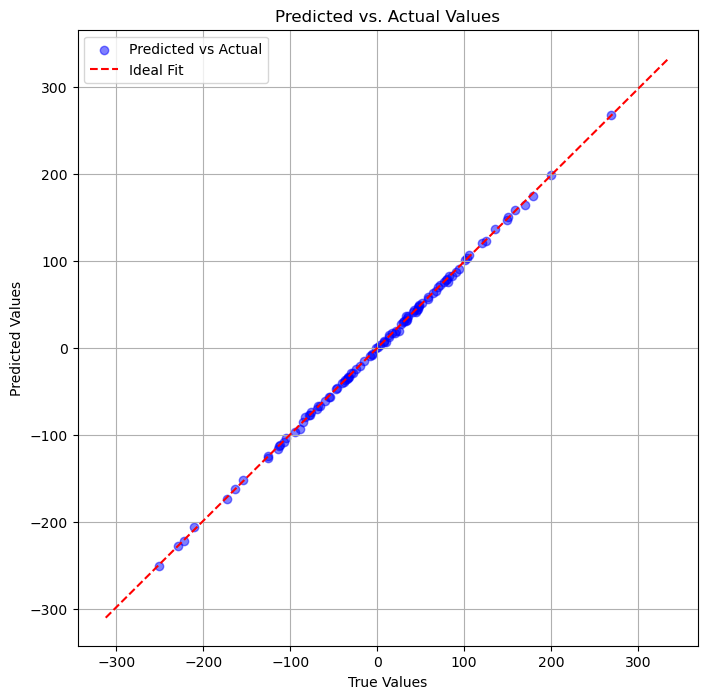

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
indices = np.random.choice(len(y_test), size=100, replace=False)
plt.scatter(y_test[indices], y_predict[indices], color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_predict), max(y_predict)], 'r--', label='Ideal Fit')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Distribution of Residuals')

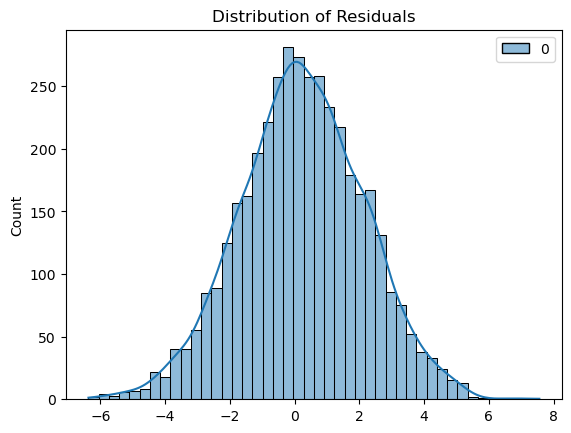

In [12]:
residuals = y_test - y_predict
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")

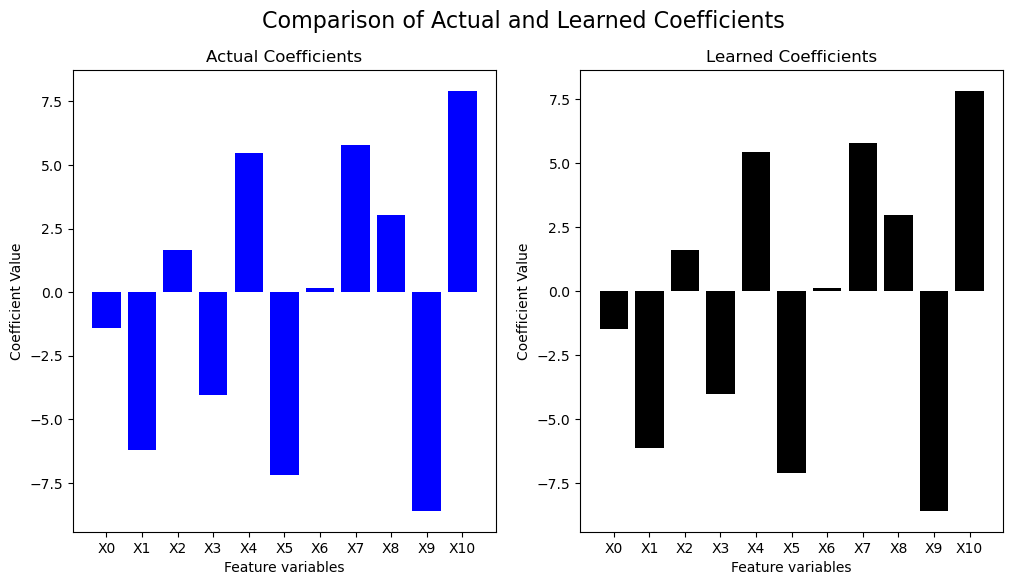

In [13]:
import pandas as pd

actual_coef_df = pd.DataFrame({'Feature': [f'X{i}' for i in range(len(beta))],
                        'Coefficient': beta.flatten()})

learned_coef_df = pd.DataFrame({'Feature': [f'X{i}' for i in range(len(model.coeff_))],
                        'Coefficient': model.coeff_.flatten()})


fig,ax = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle("Comparison of Actual and Learned Coefficients", fontsize=16)
ax[0].bar(actual_coef_df['Feature'], actual_coef_df['Coefficient'], color='blue', alpha=1.0)
ax[0].set_title("Actual Coefficients")
ax[0].set_xlabel("Feature variables")
ax[0].set_ylabel("Coefficient Value")

ax[1].bar(learned_coef_df['Feature'], learned_coef_df['Coefficient'], color='black', alpha=1.0)
ax[1].set_title("Learned Coefficients")
ax[1].set_xlabel("Feature variables")
ax[1].set_ylabel("Coefficient Value")
plt.show()
